# What Predicts Support For Government Regulation of "Big Tech"?
Karen Detter -
Fall 2023

***Background / Research Question***

In 2001, Google piloted a program to boost profits, which were sinking as the “dot-com bubble” burst, by collecting data generated from users’ search queries and using it to sell precisely targeted advertising. The company’s ad revenues grew so quickly that they expanded their data collection tools with tracking “cookies” and predictive algorithms. Other technology firms took notice of Google’s soaring profits, and the sale of passively-collected data from people’s online activities soon became the predominant business model of the internet economy (Zuboff, 2015).

As the data-collection practices of “Big Tech” firms, including Google, Amazon, Facebook (Meta), Apple, and Microsoft, have gradually been exposed, the public is now aware that the “free” platforms that have become essential to daily life are actually harvesting personal information as payment. Despite consumers being essentially extorted into accepting this arrangement, regulatory intervention into “surveillance capitalism” has remained limited.

Over the two decades since passive data collection began commercializing the internet, survey research has shown the American public’s increasing concern over the dominance Big Tech has been allowed to exert. A 2019 study conducted by Pew Research Center found that 81% of Democrats and 70% of Republicans think there should be more government regulation of corporate data-use practices (Pew Research Center, 2019). It is very unusual to find majorities of both Republicans and Democrats agreeing on any policy position, since party affiliation is known to be a main predictor of any political stance, especially in the current polarized climate.

The natural question that arises, then, is what other factors might predict support for increased regulation of data-collection practices?

***Hypothesis***

Although few studies have directly examined the mechanisms behind public support for regulation of passive data collection, a good amount of research has been done on factors influencing individual adoption of privacy protection measures (Barth et al., 2019; Boerman et al., 2021; Turow et al., 2015). It seems a reasonable extrapolation that these factors would similarly influence support for additional data privacy regulation, leading to these hypotheses:

- A higher level of awareness of data collection issues predicts support for increased Big Tech regulation.

- Greater understanding of how companies use passively collected data predicts support for increased regulation.

- The feeling of having no personal control over online tracking predicts support for increased regulation

Since there are currently dozens of data privacy bills pending in Congress, pinpointing the forces driving support for this type of legislation can help with both shaping the regulatory framework needed and appealing for broader support from voters.

# 1) Data Collection
Pew Research Center’s American Trends Panel (Wave 49) data set can provide insight into which of these factors are predictive of support for greater regulation of technology company data practices. In June 2019, an online survey covering a wide variety of topics was conducted and 4,272 separate observations for 144 variables were collected from adults age 18 and over. Half of the sample population was directly asked about support for government regulation of technology companies, with n = 2,140 for the variables included in this analysis. The margin of error (at the 95% confidence level) was given as +/- 1.87 percentage points.

The data set was compiled in SPSS and all pertinent variables are categorical.

In [8]:
# Download SPSS data file

%pip install requests pandas
%pip install pyreadstat

import requests
import pandas as pd
import pyreadstat

# Define the URL of the file
url = "https://github.com/kdetter/files/raw/main/ATPW49.sav"

# Send a GET request to the URL to download the file
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content of the response to a file
    with open('ATPW49.sav', 'wb') as file:
        file.write(response.content)

    # Load the downloaded file into a pandas DataFrame
    try:
        df = pd.read_spss('ATPW49.sav')
        print("Data loaded successfully into 'df'")
    except pd.errors.ParserError as e:
        print(f"Error loading the data: {e}")
else:
    print("Failed to download the file. Check the URL or your internet connection.")

Data loaded successfully into 'df'


# 2) Data Wrangling / Cleaning

Since the data set covers a wide variety of topics, selecting the variables of interest into a subset data frame makes it easier to manage.

In [9]:
# Create a list of variable names to select
selected_vars = ['PRIVACYNEWS1_W49', 'CONTROLCO_W49', 'UNDERSTANDCO_W49', 'ANONYMOUS1CO_W49', 'GOVREGV1_W49', 'F_AGECAT', 'F_EDUCCAT', 'F_PARTYSUM_FINAL', 'F_IDEO']

# Create a subset data frame
sel_vars = df[selected_vars].copy()

Subset variables are then renamed for clarity and to align with the concepts as operationalized.

In [10]:
sel_vars = sel_vars.rename(columns={
    'PRIVACYNEWS1_W49': 'AWARENESS',
    'CONTROLCO_W49': 'CONTROL',
    'UNDERSTANDCO_W49': 'UNDERSTANDING',
    'ANONYMOUS1CO_W49': 'RESIGNATION',
    'GOVREGV1_W49': 'GovtReg',
    'F_AGECAT': 'Age',
    'F_EDUCCAT': 'Education',
    'F_PARTYSUM_FINAL': 'Party',
    'F_IDEO': 'Ideology'
})

Some transformation and cleaning is required before computing any statistics, including removal of user-defined missing values.

In [11]:
# Set 'Refused' and 'Don't Know' values to NA
def replace_values(value):
    if value in ['Refused', 'Don\'t Know']:
        return 'NA'
    else:
        return value

# Apply the function to each element in the DataFrame
sel_vars = sel_vars.applymap(replace_values)

# Remove 'NA' values from the DataFrame
sel_vars_cleaned = sel_vars.replace('NA', pd.NA).dropna()

Since the trait of interest is support for government regulation of online data collection, collapsing the factor levels of the outcome variable GovtReg to two values - “More regulation” and “Not More regulation” - helps clarify the construct of “support”.

In [12]:
# Define function to collapse values
def collapse_govt_reg(row):
    if row == 'About the same amount' or row == 'Less regulation':
        return 'Not More regulation'
    else:
        return row

# Apply the function to the 'GovtReg' column
sel_vars_cleaned['GovtReg'] = sel_vars_cleaned['GovtReg'].apply(collapse_govt_reg)

The data set is now primed for analysis.

# 3) Data Visualization

As an initial assessment, a summary of response frequencies gives a good overview of trends surrounding the issues represented by the variables.

In [13]:
# Create frequency summary
summary = {}
for column in sel_vars_cleaned.columns:
    freq_counts = sel_vars_cleaned[column].value_counts()
    summary[column] = freq_counts

# Display the summary
for column, frequencies in summary.items():
    print(f"Variable: {column}")
    print(frequencies)
    print("\n")


Variable: AWARENESS
Somewhat closely      1023
Not too closely        647
Very closely           233
Not at all closely     141
Name: AWARENESS, dtype: int64


Variable: CONTROL
Very little control        1099
No control                  593
Some control                291
A great deal of control      61
Name: CONTROL, dtype: int64


Variable: UNDERSTANDING
Very little     996
Some            694
Nothing         230
A great deal    124
Name: UNDERSTANDING, dtype: int64


Variable: RESIGNATION
No, it is not possible    1308
Yes, it is possible        736
Name: RESIGNATION, dtype: int64


Variable: GovtReg
More regulation        1591
Not More regulation     453
Name: GovtReg, dtype: int64


Variable: Age
30-49    633
50-64    625
65+      462
18-29    324
Name: Age, dtype: int64


Variable: Education
College graduate+        781
H.S. graduate or less    695
Some College             565
Don't know/Refused         3
Name: Education, dtype: int64


Variable: Party
Dem/Lean Dem          1117


Cross tabulation of the variables can also help identify possible predictors.

In [14]:
for column in sel_vars_cleaned.columns.difference(['GovtReg']):
    cross_tab = pd.crosstab(sel_vars_cleaned['GovtReg'], sel_vars_cleaned[column])
    print(f"Cross-tabulation for {column}:\n{cross_tab}\n")

Cross-tabulation for AWARENESS:
AWARENESS            Not at all closely  Not too closely  Somewhat closely  \
GovtReg                                                                      
More regulation                      86              479               834   
Not More regulation                  55              168               189   

AWARENESS            Very closely  
GovtReg                            
More regulation               192  
Not More regulation            41  

Cross-tabulation for Age:
Age                  18-29  30-49  50-64  65+
GovtReg                                      
More regulation        238    475    500  378
Not More regulation     86    158    125   84

Cross-tabulation for CONTROL:
CONTROL              A great deal of control  No control  Some control  \
GovtReg                                                                  
More regulation                           46         466           195   
Not More regulation                       15   

The contingency table of this data, however, reveals no clear relationship between any of these subgroups and opinion on regulation of Big Tech.

The next step, then, is visualization - bar charts can make basic patterns in categorical data easier to spot. Grouping the target variable, support for government regulation of Big Tech, by various predictor categories should paint a clearer picture of who is in favor of more regulation.

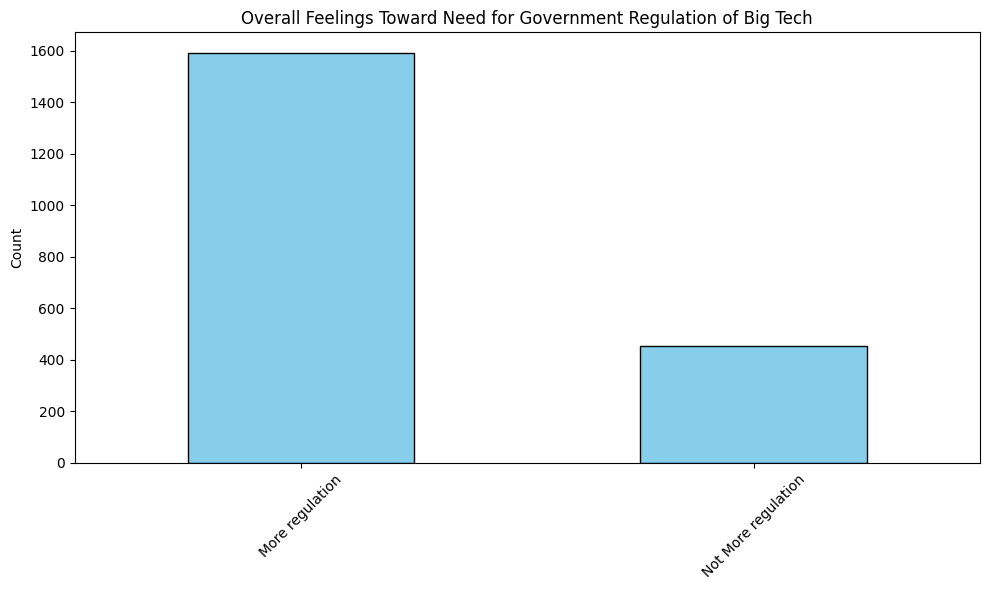

In [15]:
# Plot of base support for government regulation

import matplotlib.pyplot as plt
data_column_name = 'GovtReg'

# Group data by the 'GovtReg' column and count the occurrences of each category
govtreg_counts = sel_vars_cleaned[data_column_name].value_counts()

# Create bar chart
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
govtreg_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Overall Feelings Toward Need for Government Regulation of Big Tech')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


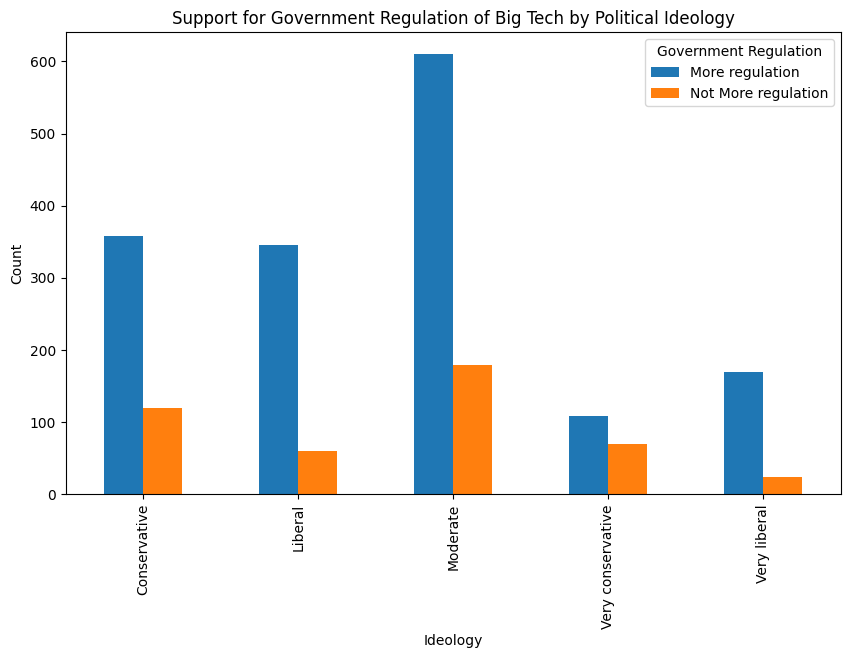

In [16]:
# GovtReg grouped by Ideology

grouped_data = sel_vars_cleaned.groupby(['Ideology', 'GovtReg']).size().unstack(fill_value=0)

# Create a bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# Set labels and title
plt.ylabel('Count')
plt.title('Support for Government Regulation of Big Tech by Political Ideology')

# Show the chart
plt.legend(title='Government Regulation')
plt.show()




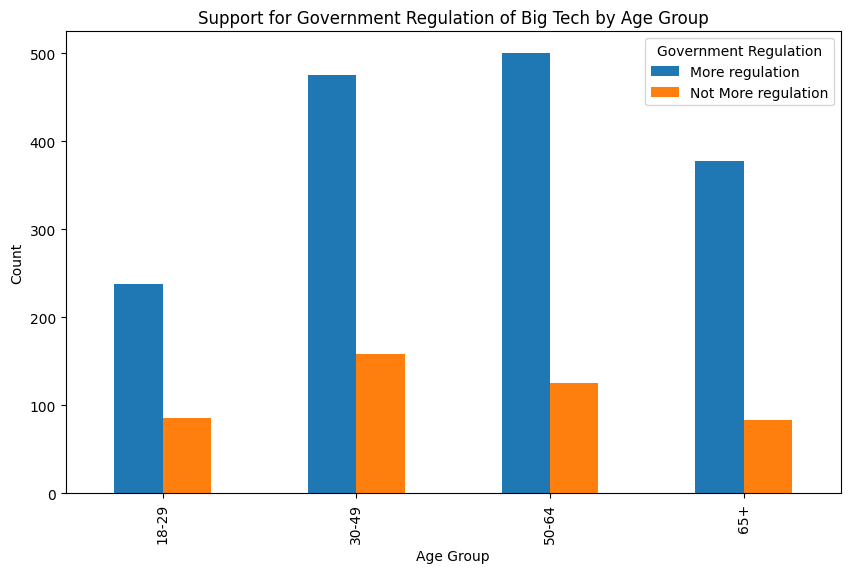

In [17]:
# GovtReg grouped by Age

grouped_data = sel_vars_cleaned.groupby('Age')['GovtReg'].value_counts().unstack().fillna(0)

# Create a bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Support for Government Regulation of Big Tech by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Government Regulation', loc='upper right')
plt.show()


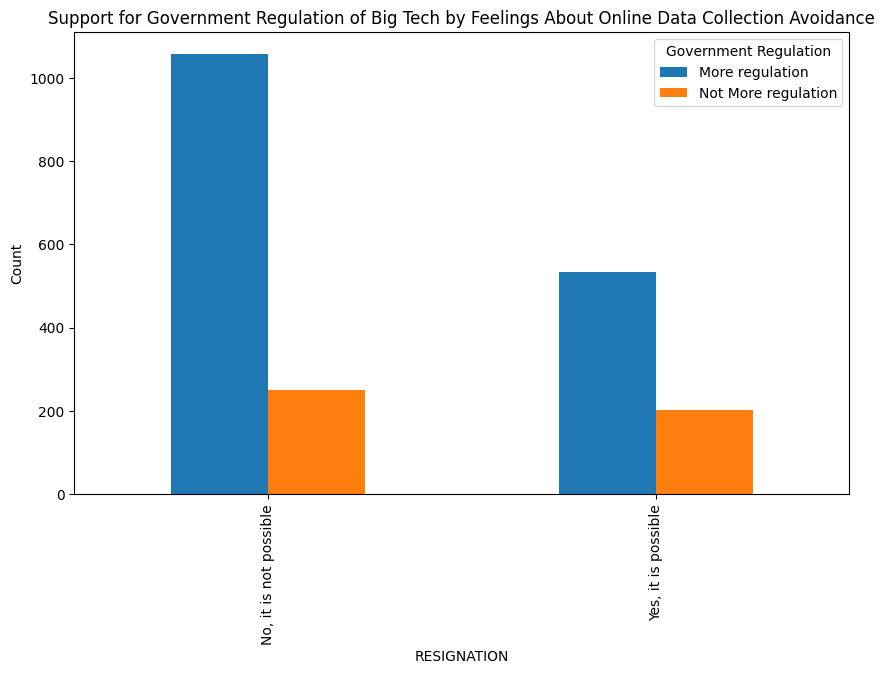

In [18]:
# GovtReg grouped by RESIGNATION

grouped_data = sel_vars_cleaned.groupby('RESIGNATION')['GovtReg'].value_counts().unstack().fillna(0)

# Create a bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Support for Government Regulation of Big Tech by Feelings About Online Data Collection Avoidance')
plt.ylabel('Count')
plt.legend(title='Government Regulation', loc='upper right')
plt.show()


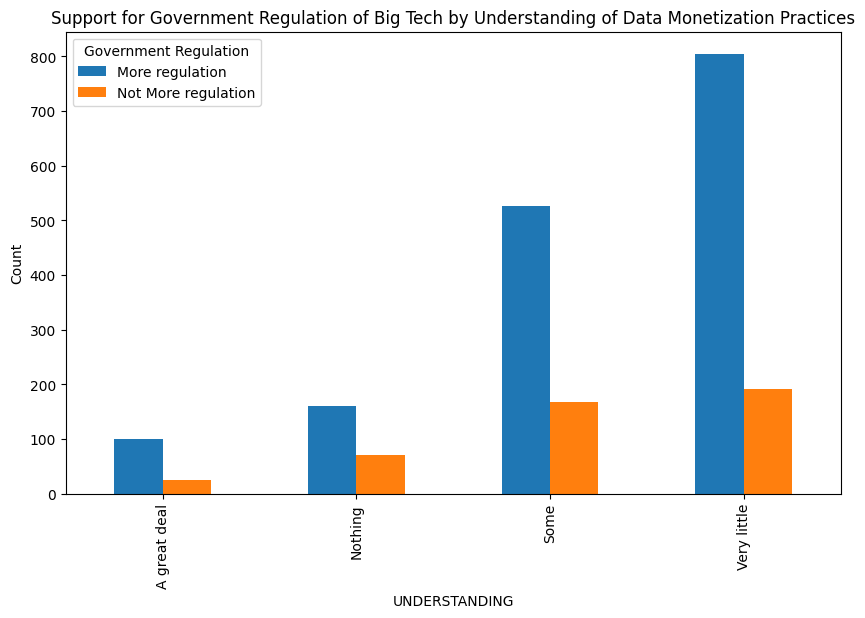

In [19]:
# GovtReg grouped by UNDERSTANDING

grouped_data = sel_vars_cleaned.groupby('UNDERSTANDING')['GovtReg'].value_counts().unstack().fillna(0)

# Create a bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Support for Government Regulation of Big Tech by Understanding of Data Monetization Practices')
plt.ylabel('Count')
plt.legend(title='Government Regulation', loc='upper left')
plt.show()


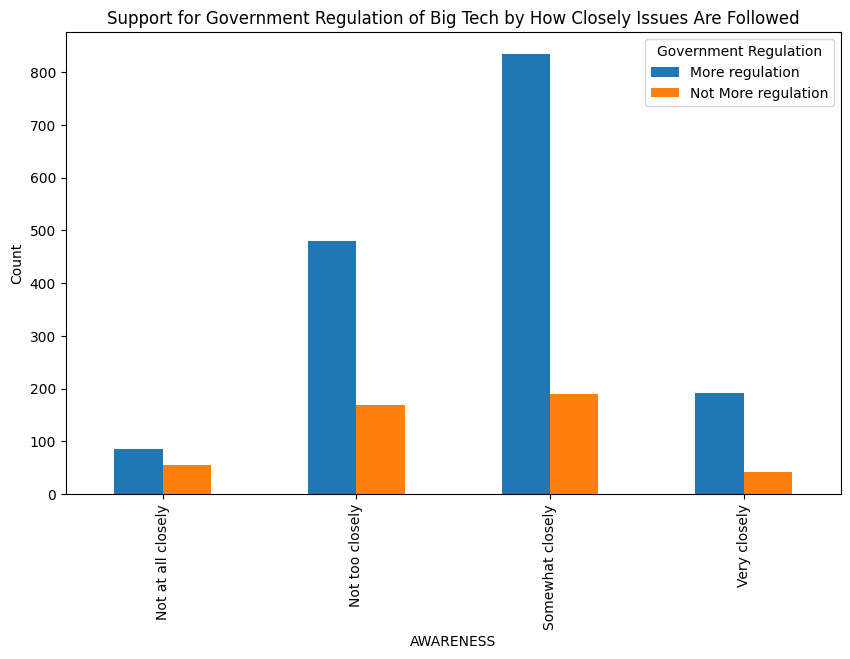

In [20]:
# GovtReg grouped by AWARENESS

grouped_data = sel_vars_cleaned.groupby('AWARENESS')['GovtReg'].value_counts().unstack().fillna(0)

# Create a bar chart
grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Support for Government Regulation of Big Tech by How Closely Issues Are Followed')
plt.ylabel('Count')
plt.legend(title='Government Regulation', loc='upper right')
plt.show()


The visualizations suggest that having little UNDERSTANDING of the mechanisms of data monetization, feeling RESIGNED to the inevitability of personal data collection, being AWARE (but not too aware) of data collection issues, being middle-AGEd, and having a moderate political IDEOLOGY may each predict support for government regulation of Big Tech to some degree.

# 4) Data Analysis

Because the dependent variable of interest, GovtReg, is binary, and the explanatory variables are categorical, it is most appropriate to fit a binary logistic regression model.

In [21]:
# Convert categorical variables to factors

sel_vars_cleaned = sel_vars_cleaned.apply(lambda x: pd.factorize(x)[0])
sel_vars_cleaned

,AWARENESS,CONTROL,UNDERSTANDING,RESIGNATION,GovtReg,Age,Education,Party,Ideology
1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,1,1
4,1,2,1,1,0,0,1,1,2
6,2,1,0,1,1,0,2,1,0
7,3,2,1,1,1,1,0,1,2
...,...,...,...,...,...,...,...,...,...
4255,2,1,2,1,1,3,1,0,0
4257,2,1,0,0,0,0,2,0,3
4258,0,1,0,0,1,3,2,0,0
4260,0,1,2,1,0,0,2,0,4


In [22]:
# Fit logistic regression model

%pip install scikit-learn
import numpy as np
from sklearn.linear_model import LogisticRegression

In [23]:
# Define the dependent variable and predictor variables
dependent_variable = 'GovtReg'
predictor_variables = ['AWARENESS', 'UNDERSTANDING', 'RESIGNATION', 'Age', 'Ideology']

# Create the logistic regression model
model = LogisticRegression(solver='lbfgs')

# Fit the model to the entire dataset
X = sel_vars_cleaned[predictor_variables]
y = sel_vars_cleaned[dependent_variable]
model.fit(X, y)

# Display the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[-0.22551804  0.12626481 -0.39311824 -0.05790102 -0.14414002]]
Intercept: [-0.55793127]


The results of the regression analysis show that only understanding of how online data is collected and monetized is positively correlated with support for government regulation. For each unit increase in understanding, support for more regulation increases by .126 units.

The coefficients of the other four predictors, however, show them to be negatively correlated with support for more government regualation of Big Tech. For example, as awareness of online data collection issues increases one unit, support for regulation decreases by .225 units. This relationship is supported by the bar chart showing decreased support for more regulation among those who most closely follow the issue. As feelings of being resigned to surrendering data in order to use the internet increase by one unit, support for more government regulation decreases by .393 units, likely due to the opinion that it won't make any difference. Similarly, for each unit increase in age and each unit move toward the opposite end of the ideological spectrum, support for more government regulation of Big Tech data collection practices decreases by .057 and .144 units, respectively.


**These results suggest that support for increased government regulation of Big Tech’s data collection policies is likely spread across more subgroups and in less predictable ways than is ordinarily expected for policy issues.**

***Python Vs. R***

Since a version of this project was previously completed using R, comparisons can be drawn between the two languages and their suitability for various aspects of data analysis. R and the RStudio IDE offer some advantages in visually assessing data, as the Tidyverse helps create easily viewed data frames in a familiar spreadsheet-like format. The catalog of thousands of R libraries that address many specific calculations and formatting needs puts R in the winner's circle for flexibility. Python, however, generally required less coding lines per task, sometimes significantly so, as in the case of plotting visualizations. It also has the distinct advantage of being able to connect to SQL to manage database queries, making it more adaptable when working with other software systems. Ultimately, though, all of the data collection, wrangling, and analysis tasks neeeded for this project were able to be completed effectively using both Python and R, so it seems, as in so many other areas of life, the choice of one over the other comes down to use case and simple preference.

# References

Barth, S., de Jong, M. D. T., Junger, M., Hartel, P. H. & Roppelt, J. C. (2019). Putting the privacy paradox to the test: Online privacy and security behaviors among users with technical knowledge, privacy awareness, and financial resources. Telematics and Informatics, 41, 55–69. doi:10.1016/j.tele.2019.03.003

Boerman, S. C., Kruikemeier, S., & Zuiderveen Borgesius, F. J. (2021). Exploring Motivations for Online Privacy Protection Behavior: Insights From Panel Data. Communication Research, 48(7), 953–977. https://doi.org/10.1177/0093650218800915

Pew Research Center. (2019). Americans and privacy: Concerned, confused and feeling lack of control over their personal information. https://www.pewresearch.org/internet/2019/11/15/americans-and-privacy-concerned-confused-and- feeling-lack-of-control-over-their-personal-information/

Pew Research Center. (2020). Wave 49 American trends panel [Data set]. https://www.pewresearch.org/internet/dataset/american-trends-panel-wave-49/

Turow, J., Hennessy, M. & Draper, N. (2015). The tradeoff fallacy – How marketers are misrepresenting American consumers and opening them up to exploitation. Annenberg School for Communication.

Zuboff, S. (2015). Big other: Surveillance capitalism and the prospects of an information civilization. Journal of Information Technology, 30(1), 75–89. doi:10.1057/jit.2015.5